<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data

customers = pd.read_csv('/Users/brunoaugusto/Library/CloudStorage/OneDrive-Pessoal/01.Bruno/01.Ironhack learning Mat/IronHack/Git_Bruno_Repo/lab-unsupervised-learning-en/data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Understand the columns

customers.head()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
customers.dtypes

#there is no cateforical data, so we can go ahead and use the data as it is

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
# Your code here:

# Handle missing data
print(customers.isnull().sum())

# the sum of the missing data is 0, so we can go ahead and use the data as it is

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


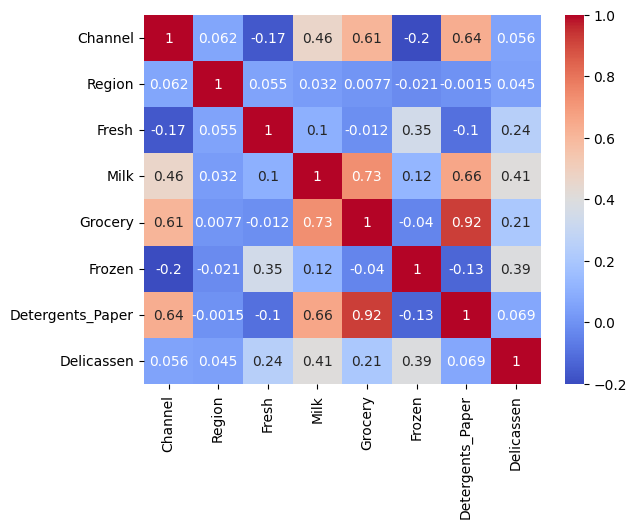

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [6]:
correlation_matrix = customers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Descriptive statistics
print(customers.describe())

**Your observations here**

Frozen, Grocery, Milk and Detergents Paper have a high correlations indicating that are related in spending terms 
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [7]:
# Your code here
print("Missing values before handling:")
print(customers.isnull().sum())



Missing values before handling:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [8]:
correlation_matrix = customers.corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery       

In [47]:
# Identify outliers in the Milk column using IQR method
Q1 = customers['Milk'].quantile(0.25)
Q3 = customers['Milk'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
clean_customers = customers[(customers['Milk'] >= lower_bound) & (customers['Milk'] <= upper_bound)]
descriptive_stats = df_cleaned.describe()

descriptive_stats

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1.296117,2.543689,11706.356796,4326.332524,6624.038835,2793.856796,2306.757282,1274.830097
std,0.457098,0.773990,11634.951263,3511.927941,6733.445634,3610.182750,3501.258196,1466.645782
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3101.500000,1449.750000,2099.250000,712.000000,245.500000,395.000000
50%,1.000000,3.000000,8504.000000,3327.500000,4383.500000,1470.000000,760.000000,904.500000
75%,2.000000,3.000000,16850.500000,6329.500000,9365.250000,3398.000000,3492.750000,1703.000000
max,2.000000,3.000000,76237.000000,15488.000000,67298.000000,35009.000000,38102.000000,14472.000000


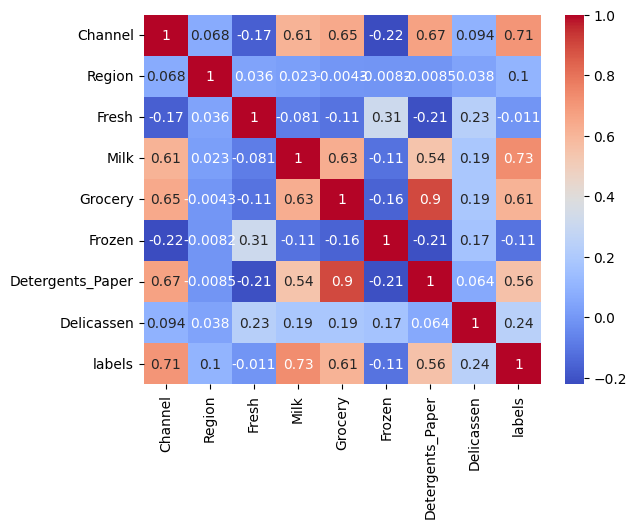

        Channel    Region     Fresh      Milk   Grocery    Frozen  \
count  9.000000  9.000000  9.000000  9.000000  9.000000  9.000000   
mean   0.378360  0.138369  0.111335  0.392771  0.410874  0.073148   
std    0.438891  0.325199  0.376579  0.398473  0.438720  0.390586   
min   -0.222152 -0.008468 -0.211583 -0.113230 -0.155458 -0.222152   
25%    0.067508 -0.004347 -0.110035  0.023164 -0.004347 -0.155458   
50%    0.613027  0.036053 -0.011425  0.544979  0.610814 -0.110627   
75%    0.666038  0.067508  0.234838  0.629119  0.646571  0.166092   
max    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

       Detergents_Paper  Delicassen    labels  
count          9.000000    9.000000  9.000000  
mean           0.366081    0.245311  0.424756  
std            0.466072    0.291893  0.382931  
min           -0.211583    0.037840 -0.110627  
25%           -0.008468    0.094231  0.101817  
50%            0.544979    0.186038  0.555486  
75%            0.666038    0.234838  0.707

In [48]:
correlation_matrixclean = clean_customers.corr()
sns.heatmap(correlation_matrixclean, annot=True, cmap='coolwarm')
plt.show()
# Descriptive statistics
print(correlation_matrixclean.describe())

**Your comment here**

-  After removing milk outliers, the mean and median decreased slightly, indicating a more concentrated distribution.
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [49]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customers = clean_customers.copy()

# Separating out the numerical features and categorical features
numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
categorical_cols = ['Channel', 'Region'] # These columns will not be scaled

# Apply StandardScaler only on numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customers[numerical_cols])

# Create a DataFrame with the scaled data
customers_scaled = pd.DataFrame(scaled_features, columns=numerical_cols)

# Add the categorical columns back to the scaled DataFrame
customers_scaled[categorical_cols] = customers[categorical_cols].reset_index(drop=True)


print(customers_scaled.describe())

print(customers_scaled.head())


              Fresh          Milk       Grocery        Frozen  \
count  4.060000e+02  4.060000e+02  4.060000e+02  4.060000e+02   
mean  -7.437947e-17 -1.050063e-16 -4.375263e-17  2.625158e-17   
std    1.001234e+00  1.001234e+00  1.001234e+00  1.001234e+00   
min   -1.008421e+00 -1.249692e+00 -9.905346e-01 -7.682509e-01   
25%   -7.426327e-01 -8.302332e-01 -6.701445e-01 -5.754721e-01   
50%   -2.765879e-01 -2.726746e-01 -3.398234e-01 -3.698736e-01   
75%    4.415651e-01  6.289192e-01  3.902192e-01  1.699346e-01   
max    5.519846e+00  2.775231e+00  9.451724e+00  8.876615e+00   

       Detergents_Paper    Delicassen     Channel      Region  
count      4.060000e+02  4.060000e+02  406.000000  406.000000  
mean       6.125368e-17  8.750526e-18    1.285714    2.546798  
std        1.001234e+00  1.001234e+00    0.452311    0.773976  
min       -6.523796e-01 -8.609191e-01    1.000000    1.000000  
25%       -5.809097e-01 -5.943268e-01    1.000000    2.000000  
50%       -4.343890e-01 -2.638

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       4  
1        1776       4  
2        7844       4  
3        1788       1  
4        5185       2  


Text(0, 0.5, 'WCSS')

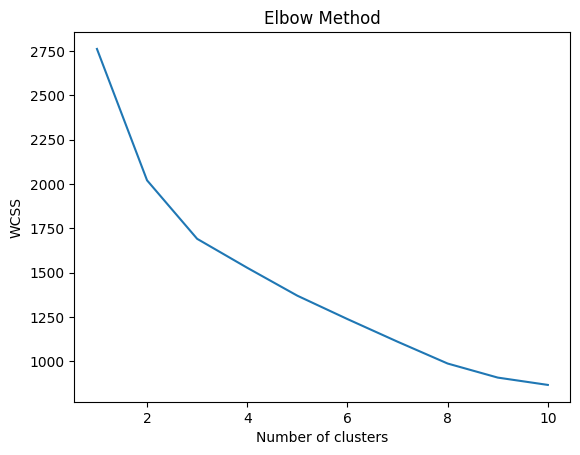

In [50]:
from sklearn.cluster import KMeans

# Your code here:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(customers_scaled)

labels = kmeans.labels_
customers['labels'] = labels

print(customers.head())

# Your code here:
# Plot the clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customers_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')





### Looking to the elbow we can choose 2 like the correct number of clusters

In [51]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scaled)

labels = kmeans_2.predict(customers_scaled)

clusters = kmeans_2.labels_.tolist()

In [52]:
clean_customers['Label'] = clusters

Count the values in `labels`.

In [53]:
# Your code here:
label_counts = clean_customers['Label'].value_counts()

print("Cluster label counts:")
print(label_counts)


Cluster label counts:
Label
0    288
1    118
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [55]:
from sklearn.cluster import DBSCAN 

# Your code here

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(customers_scaled)
clean_customers['labels_DBSCAN'] = dbscan.labels_


Count the values in `labels_DBSCAN`.

In [56]:
# Your code here
label_countsDB = clean_customers['labels_DBSCAN'].value_counts()

print("Cluster labels DBSCAN counts:")
print(label_countsDB)

Cluster labels DBSCAN counts:
labels_DBSCAN
-1    325
 0     75
 1      6
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [68]:
def plot1(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

def plot2(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Grocery vs Fresh')
    return plt.show();

def plot3(x,y,hue,title):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Frozen vs delicassen')
    return plt.show();



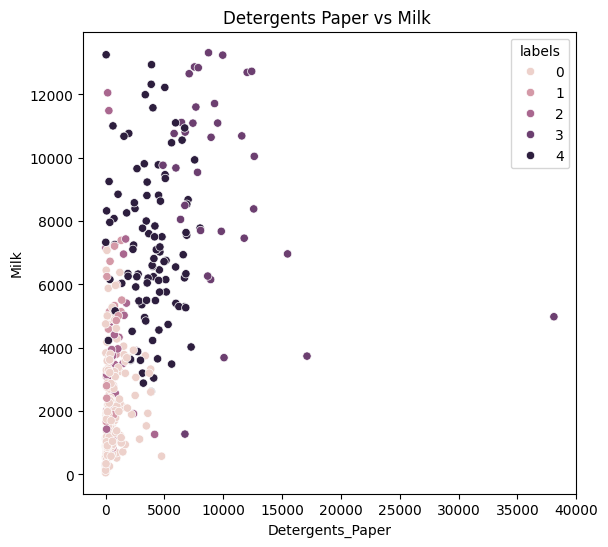

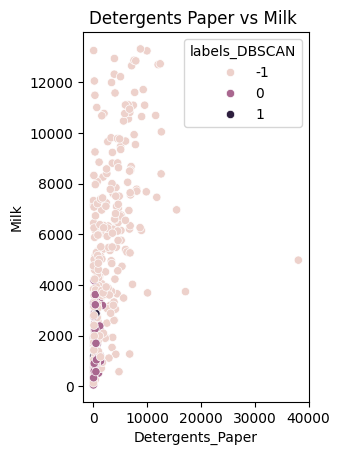

In [69]:
# Your code here:
# Visualize Detergents_Paper vs Milk by labels (K-means)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot(clean_customers['Detergents_Paper'], clean_customers['Milk'], clean_customers['labels'], 'K-means Clustering: Detergents_Paper vs Milk')

# Visualize Detergents_Paper vs Milk by labels_DBSCAN (DBSCAN)
plt.subplot(1, 2, 2)
plot(clean_customers['Detergents_Paper'], clean_customers['Milk'], clean_customers['labels_DBSCAN'], 'DBSCAN Clustering: Detergents_Paper vs Milk')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

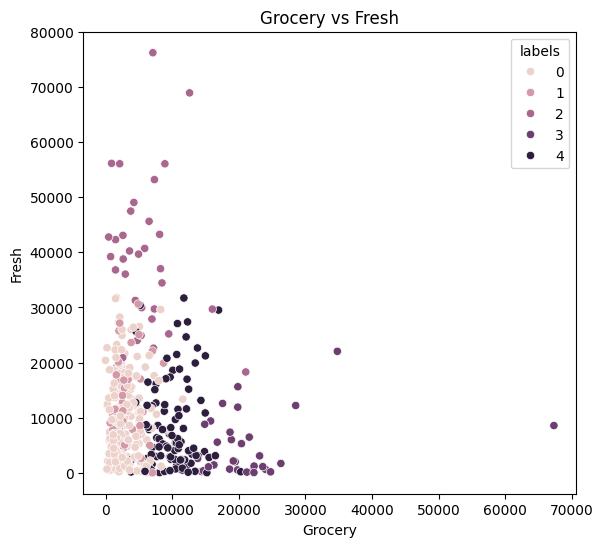

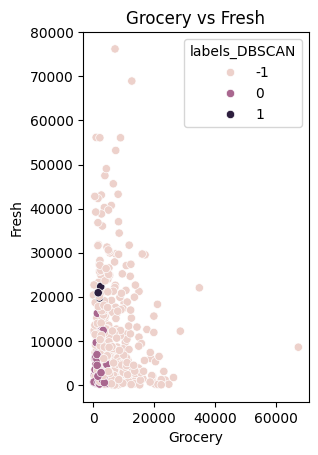

In [71]:
# Your code here:
# Visualize Grocery vs Fresh by labels (K-means)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot2(clean_customers['Grocery'], clean_customers['Fresh'], clean_customers['labels'], 'K-means Clustering: Grocery vs Fresh')

# Visualize Grocery vs Fresh by labels_DBSCAN (DBSCAN)
plt.subplot(1, 2, 2)
plot2(clean_customers['Grocery'], clean_customers['Fresh'], clean_customers['labels_DBSCAN'], 'DBSCAN Clustering: Grocery vs Fresh')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

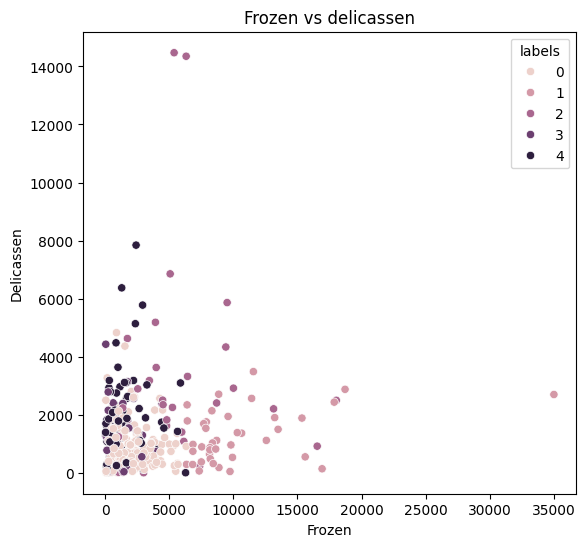

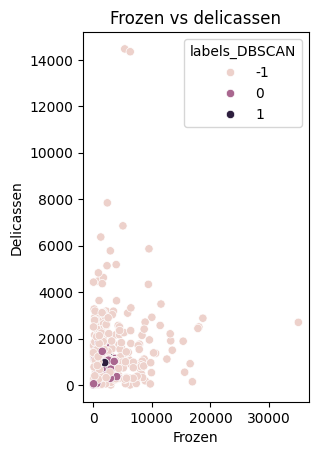

In [72]:
# Your code here:
# Visualize Frozen vs Delicassen by labels (K-means)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot3(clean_customers['Frozen'], clean_customers['Delicassen'], clean_customers['labels'], 'K-means Clustering: frozen vs delicassen')

# Visualize Frozen vs Delicassen by labels_DBSCAN (DBSCAN)
plt.subplot(1, 2, 2)
plot3(clean_customers['Frozen'], clean_customers['Delicassen'], clean_customers['labels_DBSCAN'], 'DBSCAN Clustering: frozen vs delicassen')


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [73]:
# Your code here:
# Group by labels (K-means) and compute the mean for all columns
kmeans_grouped_means = clean_customers.groupby('labels').mean()
print("Means for each group (K-means):")
print(kmeans_grouped_means)

# Group by labels_DBSCAN (DBSCAN) and compute the mean for all columns
dbscan_grouped_means = clean_customers.groupby('labels_DBSCAN').mean()
print("\nMeans for each group (DBSCAN):")
print(dbscan_grouped_means)

Means for each group (K-means):
         Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       1.030000  2.490000   9639.690000  2057.285000   2853.480000   
1       1.075000  2.450000  13414.825000  3139.275000   3478.750000   
2       1.090909  2.696970  39633.060606  3941.484848   5935.727273   
3       1.969697  2.333333   4763.545455  9385.787879  21386.818182   
4       1.720000  2.720000   8525.990000  7171.610000   9814.240000   

              Frozen  Detergents_Paper   Delicassen     Label  labels_DBSCAN  
labels                                                                        
0        1847.315000        623.185000   817.555000  0.000000         -0.565  
1       10498.275000        486.975000  1280.525000  0.000000         -1.000  
2        5504.878788        926.727273  3065.757576  0.151515         -1.000  
3        1221.969697      10031.757576  1291.121212  1.000000         -1.00

Which algorithm appears to perform better?

In [76]:
from sklearn.metrics import silhouette_score
import numpy as np

# K-means Silhouette Score
kmeans_labels = clean_customers['labels'].to_numpy()  # use actual K-means labels
silhouette_score_kmeans = silhouette_score(customers_scaled, kmeans_labels)
print("Silhouette Score for K-means: ", silhouette_score_kmeans)

# DBSCAN Silhouette Score
dbscan_labels = clean_customers['labels_DBSCAN'].to_numpy()  # use actual DBSCAN labels
silhouette_score_dbscan = silhouette_score(customers_scaled, dbscan_labels)
print("Silhouette Score for DBSCAN: ", silhouette_score_dbscan)

Silhouette Score for K-means:  0.2639251216383778
Silhouette Score for DBSCAN:  -0.12457536206196239


**Your observations here**

- K-means Silhouette Score: 0.2639 - While this score is not excellent, it is positive and suggests that the clusters are somewhat distinct.
DBSCAN Silhouette Score: -0.1246 - This negative score indicates that many samples might be assigned to the wrong cluster, suggesting poor clustering.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 